In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [4]:
fmnist=tf.keras.datasets.fashion_mnist

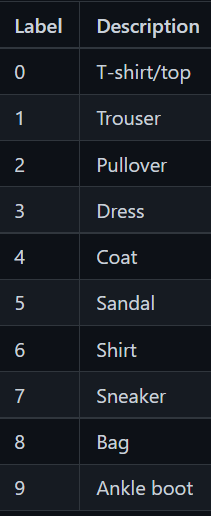

In [5]:
(X_train,X_test),(y_train,y_test)=fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

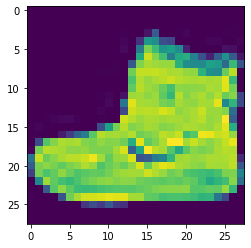

In [6]:
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)      #increasing capacity of row
print(X_train[0])


plt.imshow(X_train[0])


#####You'll notice that all values are between 0 and 255. If you are training a neural network especially an image processing various reasons it will usually learn better if you scale all values to between 0 and 1. Its a process called ***Normalisation*** .

In [7]:
#Normalise the pixel values of the train and test images
X_train=X_train/255.0
y_train=y_train/255.0

In [8]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [9]:
#np.set_printoptions(linewidth=500)      #increasing capacity of row
#print(X_train[0])

In [10]:
#Just an Example of working of Activation Function--softmax

'''

#Declare sample inputs and convert to a tensor
input=np.array([[1.0,3.0,4.0,2.0]])     #2d
input=tf.convert_to_tensor(input)
print(f"input to softmax function: {input.numpy()}")

#Feed this input to the softmax activation function
output=tf.keras.activations.softmax(input)
print(f"The output of softmax function: {output}")

#Get the sum of all values after the softmax
sum=tf.reduce_sum(output)
print(f"Sum of output is {sum}")

#Get the index with highest value
prediction=np.argmax(output)
print(f"class with highest probability is : {prediction}")

'''

'\n\n#Declare sample inputs and convert to a tensor\ninput=np.array([[1.0,3.0,4.0,2.0]])     #2d\ninput=tf.convert_to_tensor(input)\nprint(f"input to softmax function: {input.numpy()}")\n\n#Feed this input to the softmax activation function\noutput=tf.keras.activations.softmax(input)\nprint(f"The output of softmax function: {output}")\n\n#Get the sum of all values after the softmax\nsum=tf.reduce_sum(output)\nprint(f"Sum of output is {sum}")\n\n#Get the index with highest value\nprediction=np.argmax(output)\nprint(f"class with highest probability is : {prediction}")\n\n'

#####The model has been defined, now we have to build the model.You do this by compiling it with an optimizer and loss function as before--and then you train it by calling model.fit() asking it to fit your training data to your training labels.It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data,then it can predict what the label for that input is.




In [11]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(X_train,X_test,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4991 - accuracy: 0.8262
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3773 - accuracy: 0.8638
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3376 - accuracy: 0.8761
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3127 - accuracy: 0.8853
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2988 - accuracy: 0.8889
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2812 - accuracy: 0.8957
Epoch 7/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2694 - accuracy: 0.8997
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2578 - accuracy: 0.9044
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2485 - accuracy: 0.9077
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.238

This tells us that the neural network is about 94% accurate in classifying training data

In [13]:
#Evaluate model on unseen data

model.evaluate(y_train,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4041 - accuracy: 0.8899


[0.4040532410144806, 0.8899000287055969]

In [17]:
#checking prediction

prediction=model.predict(y_train)

In [21]:
prediction[0]

array([6.1606623e-13, 7.3449725e-15, 1.1363561e-10, 1.5122755e-19, 1.3127631e-15, 1.9192315e-05, 3.9660395e-13, 1.3841686e-05, 8.0270253e-16, 9.9996698e-01], dtype=float32)

the category with highest value is the predicted answer: here its 9

In [23]:
y_test[0]

9

Well it predicted correct Class for the image.

In [24]:
prediction[5]

array([5.6092118e-09, 1.0000000e+00, 3.4989780e-17, 2.9505123e-13, 5.4529197e-16, 4.4265601e-27, 1.1367511e-14, 4.5112074e-38, 5.6305357e-19, 1.4738483e-18], dtype=float32)

In [25]:
y_test[5]

1

Here prediction was wrong.